In [2]:
import pandas as pd
df = pd.read_csv('/Users/keryseverinodiaz/Desktop/GitHub/AI_ML_Roadmap/datasets/netflix_titles.csv')

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [11]:
print(df.columns.to_list())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [10]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')

In [15]:
print(df['date_added'].isnull().sum())


10


In [16]:
df = df.dropna(subset=['date_added'])

In [17]:
print(df['type'].value_counts())

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


In [18]:
print(df['country'].value_counts().head(10))

country
United States     2812
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


In [19]:
print(df['listed_in'].value_counts().head(10))

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


In [20]:
df['year_added'] = df['date_added'].dt.year
print(df['year_added'].value_counts().sort_index())

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: count, dtype: int64


In [21]:
movies_2020 = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
print(movies_2020[['title', 'release_year']].head())

                                                 title  release_year
0                                 Dick Johnson Is Dead          2020
16   Europe's Most Dangerous Man: Otto Skorzeny in ...          2020
78                                      Tughlaq Durbar          2020
84                                Omo Ghetto: the Saga          2020
103                                     Shadow Parties          2020


In [22]:
tvma_shows = df[(df['type'] == 'TV Show') & (df['rating'] == 'TV-MA')]
print(tvma_shows[['title', 'rating']].head())

                   title rating
1          Blood & Water  TV-MA
2              Ganglands  TV-MA
3  Jailbirds New Orleans  TV-MA
4           Kota Factory  TV-MA
5          Midnight Mass  TV-MA


In [23]:
us_india = df[df['country'].isin(['India', 'United States'])]
print(us_india[['title', 'country']].head())


                   title        country
0   Dick Johnson Is Dead  United States
4           Kota Factory          India
9           The Starling  United States
15     Dear White People  United States
24                 Jeans          India


In [24]:
print(df['rating'].value_counts())

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [25]:
print(df['release_year'].value_counts().sort_index(ascending=True))

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1146
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64


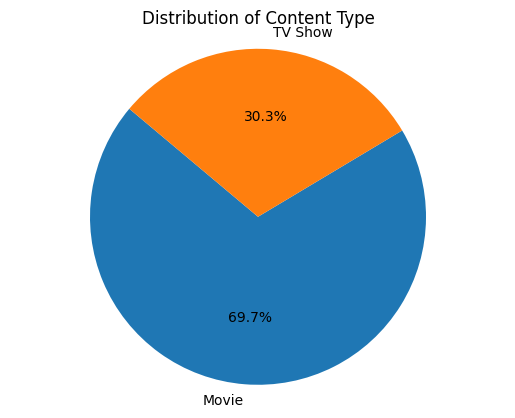

In [26]:
import matplotlib.pyplot as plt

type_counts = df['type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Type')
plt.axis('equal')
plt.show()


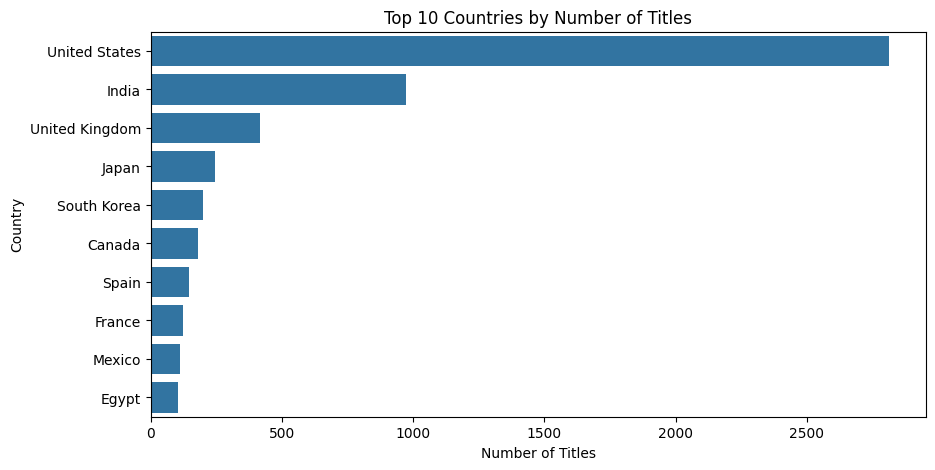

In [27]:
import seaborn as sns

top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


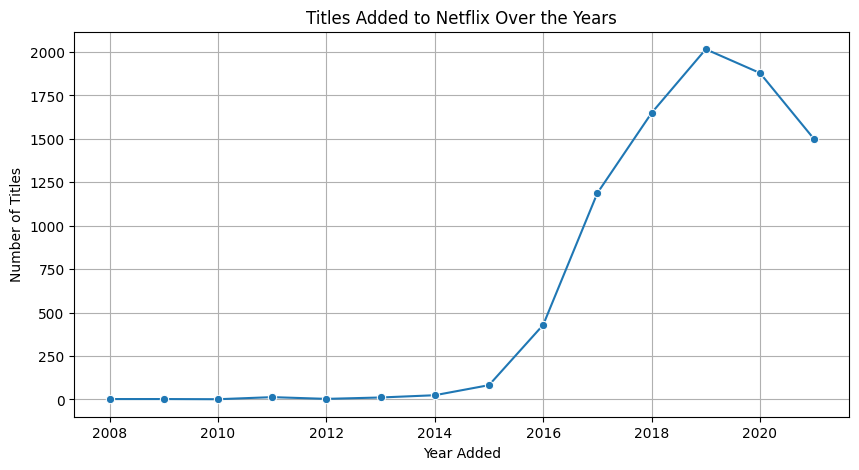

In [28]:
titles_per_year = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x=titles_per_year.index, y=titles_per_year.values, marker='o')
plt.title('Titles Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


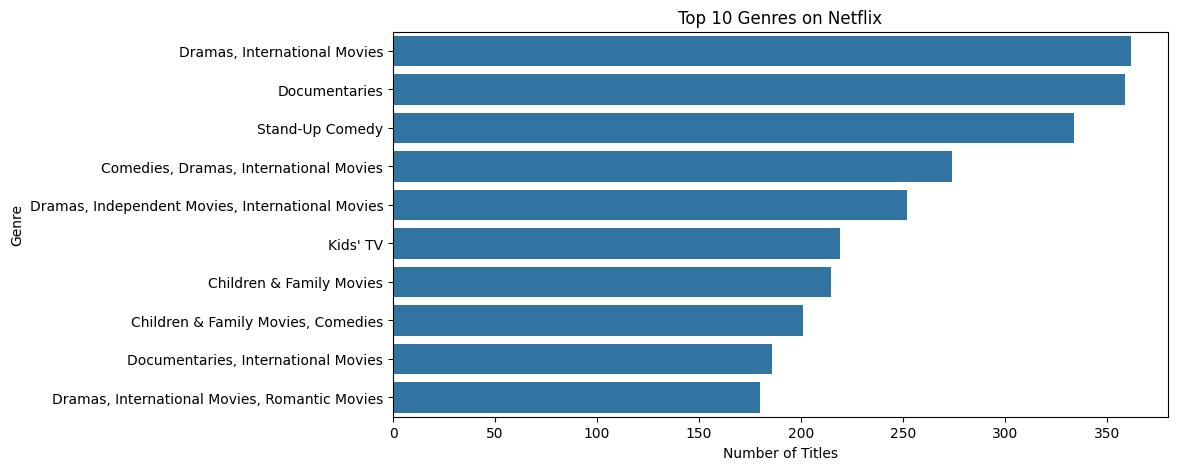

In [29]:
top_genres = df['listed_in'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()
